<a href="https://colab.research.google.com/github/Hamashyach/AnaliseDados_projeto1/blob/main/ProjetoMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Músicas mais tocadas em 2024**

A base de dados Top Music 2024 é um conjunto de dados contemporâneo que reúne informações sobre as músicas mais populares de 2024 em diversas plataformas digitais, como Spotify, YouTube, TikTok, Apple Music, entre outras. Ela contém registros detalhados de métricas de engajamento, como número de execuções, visualizações, curtidas, presença em playlists e índices de popularidade. A base possui 4600 registros e 29 variáveis. Seu objetivo é permitir a análise de padrões que influenciam a popularidade musical e o impacto das redes sociais na difusão das faixas.

**Desafios de análise:**

-Identificar padrões musicais que impulsionam popularidade.

-Avaliar impacto de diferentes mídias sociais na divulgação de músicas.

-Analisar métricas de engajamento ao longo do tempo.

# **Dicionário das variáveis**

**Track Name:** Nome da música.

**Album Name:** Álbum.

**Artist:** Artista(s).

**Release Date:** Data de lançamento.

**ISRC:** Código internacional da faixa.

**All Time Rank:** Posição no ranking histórico.

**Track Score:** Nota atribuída à faixa.

**Spotify Streams:** Execuções no Spotify.

**Spotify Playlist Count:** Presença em playlists do Spotify.

**Spotify Playlist Reach:** Alcance nas playlists do Spotify.

**Spotify Popularity:** Popularidade no Spotify.

**YouTube Views:** Visualizações no YouTube.

**YouTube Likes:** Curtidas no YouTube.

**TikTok Posts:** Publicações no TikTok.

**TikTok Likes:** Curtidas no TikTok.

**TikTok Views:** Visualizações no TikTok.

**YouTube Playlist Reach:** Alcance nas playlists do YouTube.

**Apple Music Playlist Count:** Presença em playlists da Apple Music.

**AirPlay Spins:** Execuções em rádios.

**SiriusXM Spins:** Execuções na SiriusXM.

**Deezer Playlist Count:** Presença em playlists do Deezer.

**Deezer Playlist Reach:** Alcance nas playlists do Deezer.

**Amazon Playlist Count:** Presença em playlists da Amazon.

**Pandora Streams:** Execuções na Pandora.

**Pandora Track Stations:** Estações da Pandora com a faixa.

**Soundcloud Streams:** Execuções no SoundCloud.

**Shazam Counts:** Número de identficações no Shazam.

**TIDAL Popularity:** Popularidade no TIDAL.

**Explicit Track:** Contém conteúdo explícito (Sim/Não).














In [3]:
#pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [5]:
#importar o arquivo dos dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/05_músicas_mais_tocadas.csv', encoding='latin-1')
print("Formato da base (linhas, colunas): ", df.shape)

#Verificar os tipos de dados
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

# Visão geral
print("\nColunas disponíveis:")
print(df.columns.tolist())

print("\nPrimeiras linhas da base:")
display(df.head())


Formato da base (linhas, colunas):  (4600, 29)

Os tipos dos atributos são do tipo:
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pand

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


De inicio notamos como o dataset é extenso e com muitas informações.



In [6]:
#Valores nulos ordenados em ordem decrescente
print("\nValores nulos por coluna:")
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)



Valores nulos por coluna:


,0
TIDAL Popularity,100.000000
Soundcloud Streams,72.456522
SiriusXM Spins,46.152174
Pandora Track Stations,27.565217
TikTok Posts,25.500000
Pandora Streams,24.043478
Amazon Playlist Count,22.934783
YouTube Playlist Reach,21.934783
TikTok Views,21.326087
TikTok Likes,21.304348


 Verificamos que existe muitos valores nulos, principalmente na váriável TIDAL Popularity que possui 100% de valores nulos, decidimos então remove-la por completo e fazer uma limpeza desses dados.

In [7]:
#Fazer uma cópia da base
df_limpo = df.copy()

# # Converte as colunas que deveriam ser float (mas sao object por causa da virgula) em verdadeiros floats
colunas_com_virgula = [
    'Spotify Streams', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
    'Deezer Playlist Reach', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts'
]

for col in colunas_com_virgula:
    df_limpo[col] = df_limpo[col].astype(str).str.replace(',', '')
    df_limpo[col] = pd.to_numeric(df_limpo[col], errors='coerce')

# Garante que a data de lancamento esta no tipo data
df_limpo['Release Date'] = pd.to_datetime(df_limpo['Release Date'], errors='coerce')

# Transforma valores binarios para "sim" e "nao"
df_limpo['Explicit Track'] = df_limpo['Explicit Track'].map({0: 'Não', 1: 'Sim'})

# TIDAL Popularity possui 100% de valores nulos, remove-la nao afetara nada
df_limpo.drop(columns=['TIDAL Popularity'], inplace=True)

# Remove linhas com uma quantidade muito grande de nulos
df_limpo = df_limpo[df_limpo.isnull().sum(axis=1) < 10]

# Visualiza a base limpa
print("Base após limpeza: ", df_limpo.shape)
display(df_limpo.head())


Base após limpeza:  (4030, 28)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,"30,716",196631588.0,...,"40,975",684,62.0,17598718.0,114.0,18004655.0,"22,931",4818457.0,2669262.0,Não
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,"28,113",174597137.0,...,"40,778",3,67.0,10422430.0,111.0,7780028.0,"28,444",6623075.0,1118279.0,Sim
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,"54,331",211607669.0,...,"74,333",536,136.0,36321847.0,172.0,5022621.0,"5,639",7208651.0,5285340.0,Não
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,"269,802",136569078.0,...,"1,474,799","2,182",264.0,24684248.0,210.0,190260277.0,"203,384",NaN,11822942.0,Não
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,"7,223",151469874.0,...,"12,185",1,82.0,17660624.0,105.0,4493884.0,"7,006",207179.0,457017.0,Sim


**Limpeza**


*  Fizemos uma cópia da tabela de dados para não alterar a tabela original

*    Removemos a coluna TIDAL Popularity

* Convertemos valores que eram object(por conta da virgula) em float.

* Garantimos que as datas de lançamento está do tipo data

*  Remove linhas com uma quantidade muito grande de nulos

* Visualizar a base limpa




In [8]:
#Descrição estatísticas dos dados
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


**Análise Estatística Descritiva**

* A popularidade no Spotify é alta, com média de 63 e poucos valores extremos.

* As variáveis de playlists (Apple, Deezer, Amazon) são assimétricas, com poucas músicas em muitas playlists e a maioria com alcance baixo.

* O Track Score mostra que poucas músicas dominam o ranking, com pontuações muito acima da média.

* A variabilidade entre plataformas é grande, indicando que algumas mídias favorecem mais certos artistas.

* A variável TIDAL Popularity está vazia e pode ser descartada.

* Cerca de 36% das músicas são explícitas, segundo a variável Explicit Track.

5. Tipo de distribuição

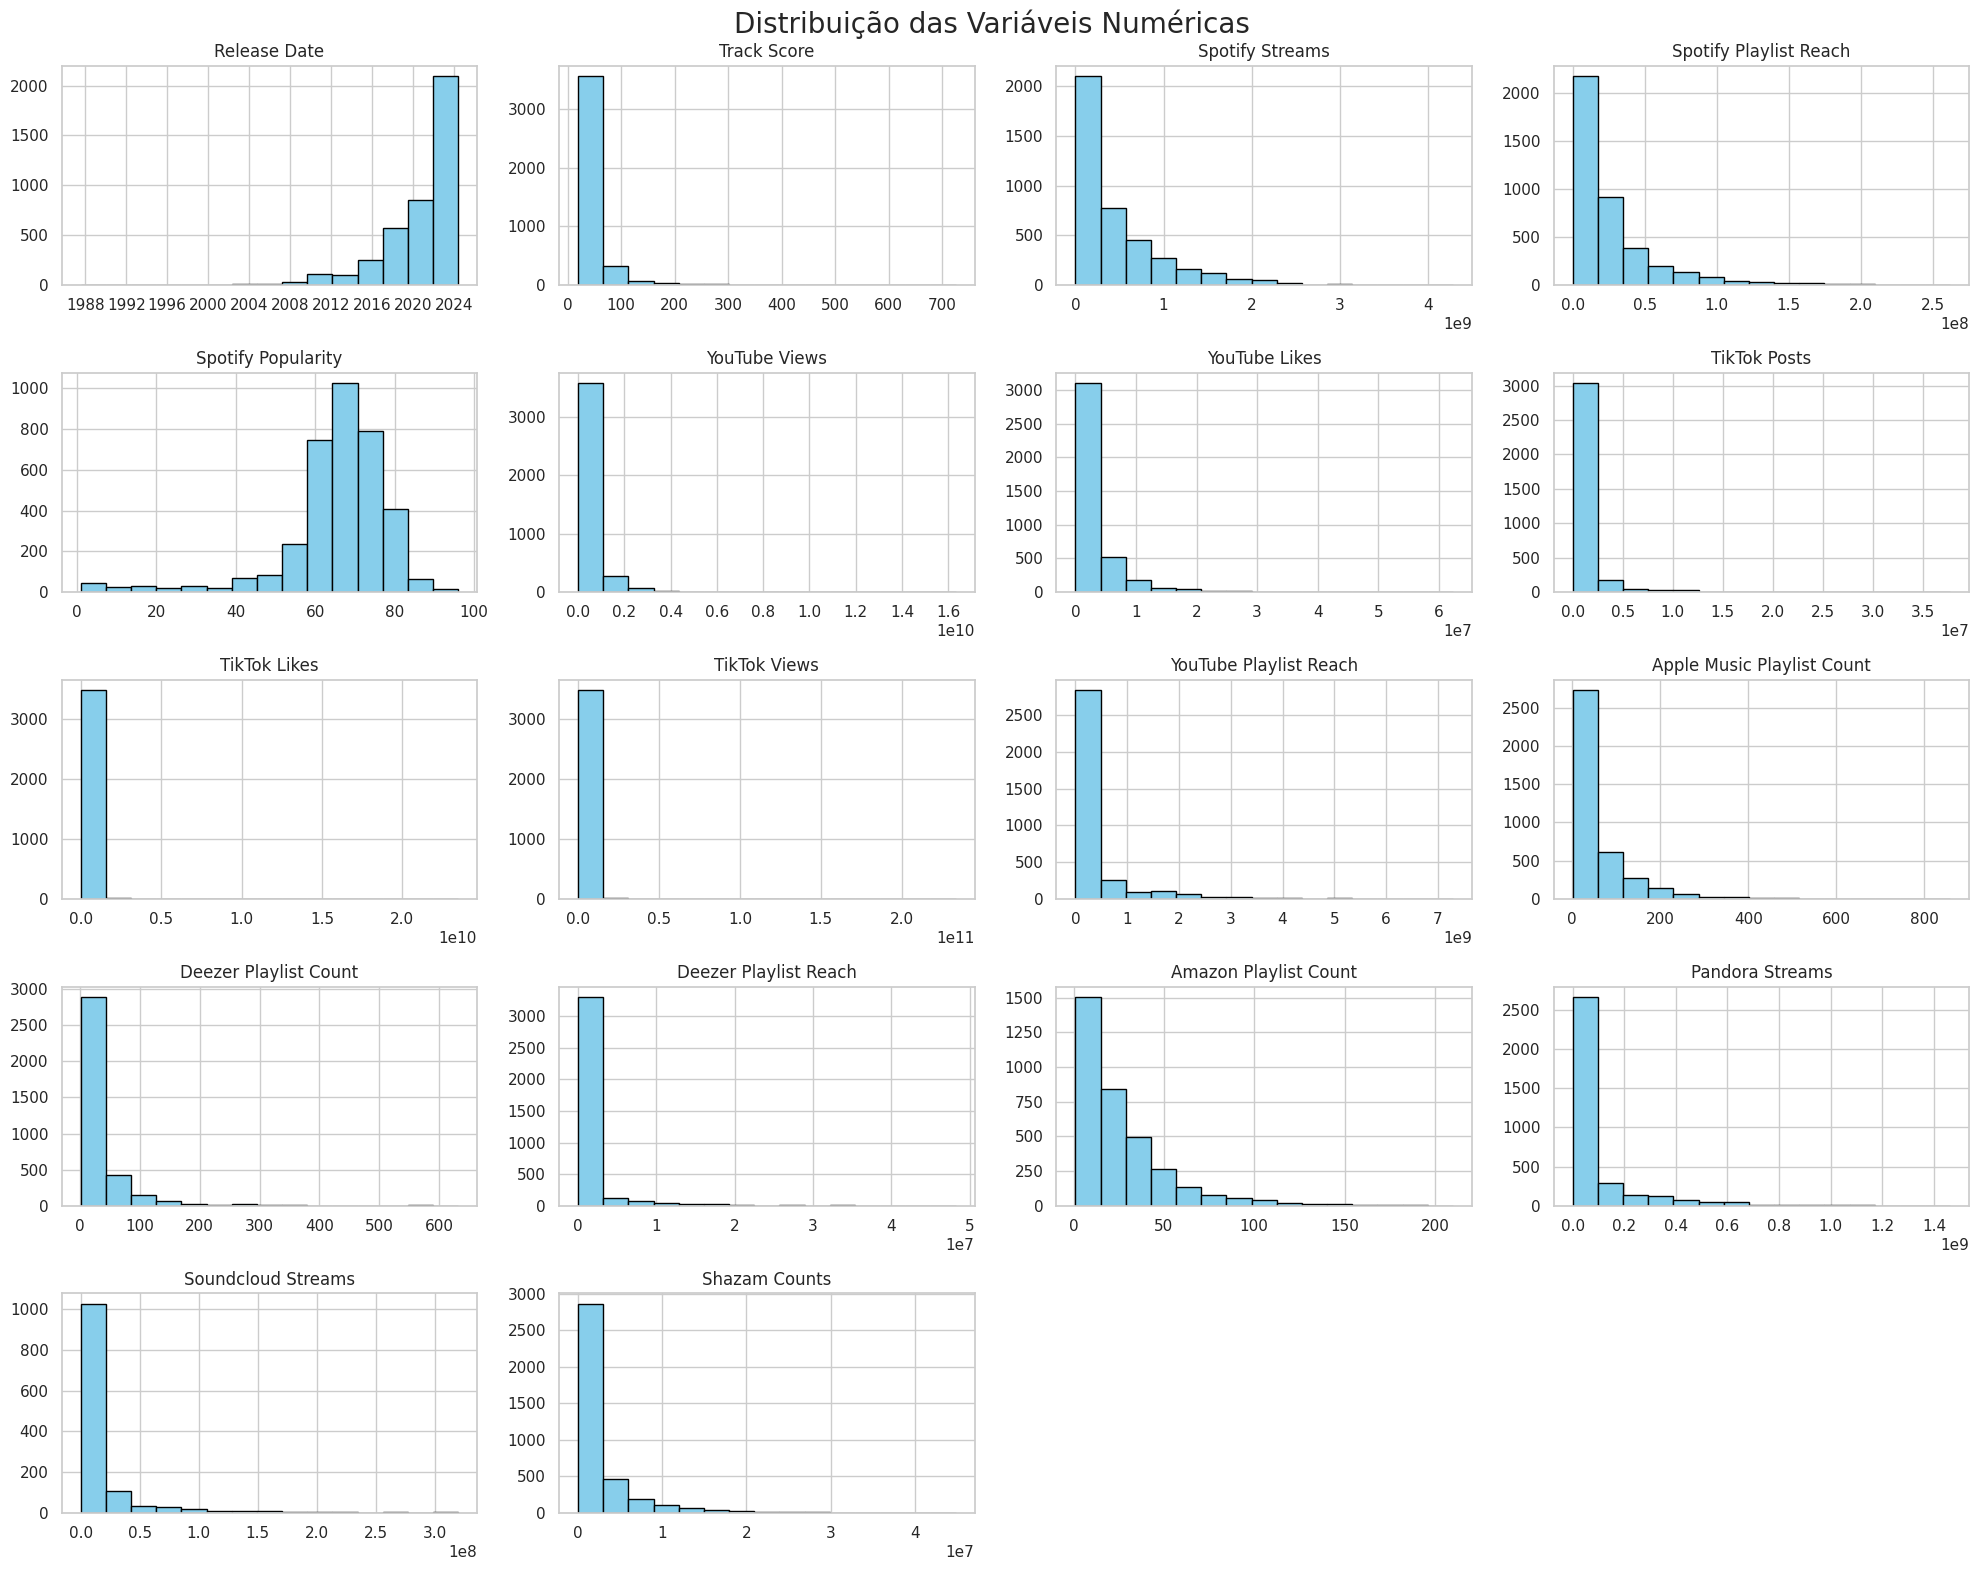

In [9]:
# Ajuste do estilo dos gráficos
sns.set_theme(style="whitegrid", palette='rocket')

# Gera todos os histogramas de colunas numéricas do df_limpo
df_limpo.hist(bins=15, figsize=(20, 16), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=20)
plt.tight_layout()
plt.show()

**Análise dos Histogramas**

* Notamos que alguns dos histogramas revelam distribuições assimétricas à direita em grande parte dos dados, como Spotify Streams, TikTok Views e Youtube Views. Isso significa que a maioria das músicas apresentam valores baixos, enquanto poucas faixas obtêm valores muito altos (hits virais).

* Já no Spotify Popularty podemos notar uma distribuição mais concentrada em faixas médias-altas, o que indica que muitas músicas são bem avaliadas ou populares dentrode um padrão esperado. Enquanto os histogramas como Souncloud Streams e Amazon playlist Count a distribuição dos dados é mais irregular. Isso mostra que nem todas as músicas estão presentes ou têm o mesmo destaque nessas mídias.

* De forma geral, os gráficos mostram um padrão comum do consumo digital: poucas músicas ganham muita atenção e a maioria tem um desempenho mais discreto, um reflexo do funcionamento dos algoritmos e da viralização nas redes.

6. Análise de Outliers

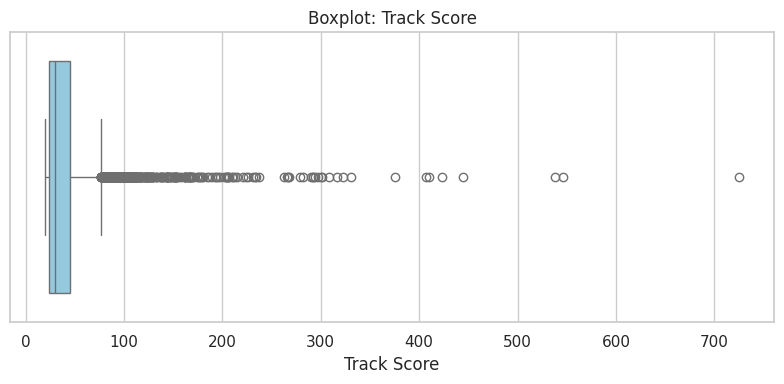

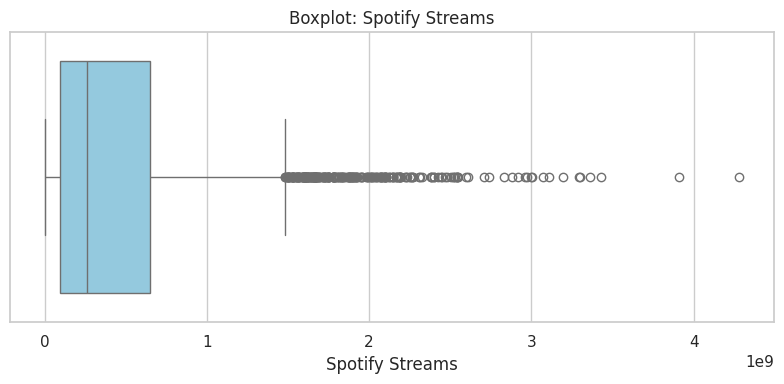

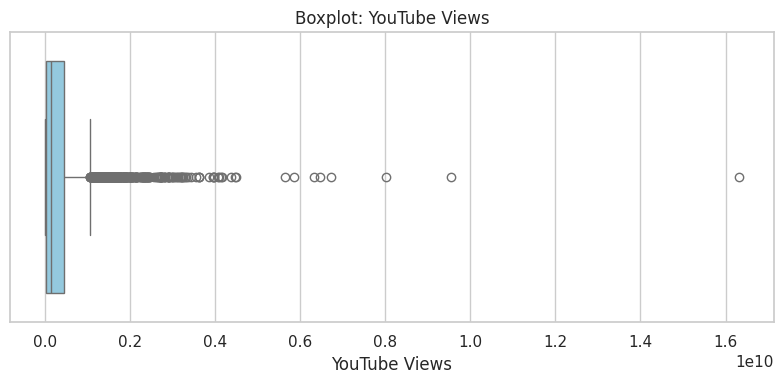

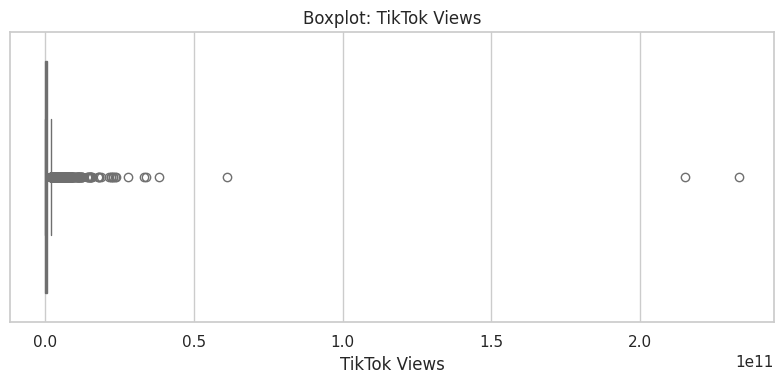

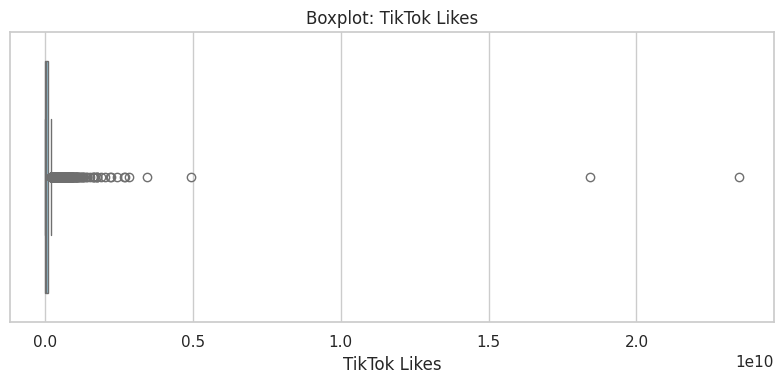

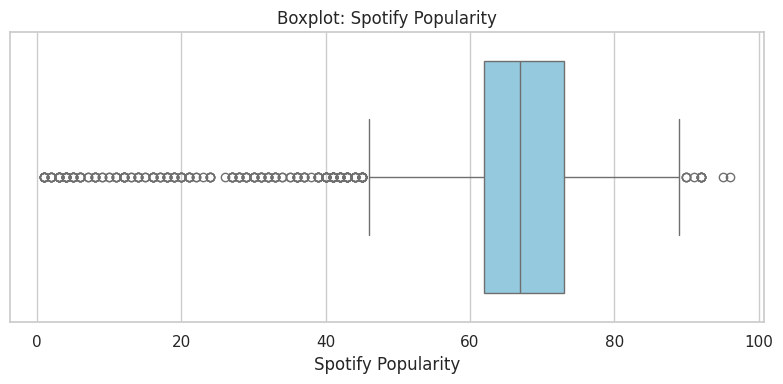

In [10]:
# Seleciona variaveis de destaque, pode ser alterado caso queira menos ou mais boxplots
variaveis_destaque = ['Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'TikTok Likes', 'Spotify Popularity']

# Cria um boxplot para cada variavel selecionada anteriormente
for col in variaveis_destaque:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_limpo[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


**Análise de Outliers com Boxplots**

*  Os boxplots das variáveis `Track Score`, `Spotify Streams`, `YouTube Views`, `TikTok Views`, `TikTok Likes` e `Spotify Popularity` revelam a presença de **outliers significativos**. Em todas essas métricas, observamos que, poucas músicas concentram os maiores valores, com destaque para faixas extremamente populares que ultrapassam a média em dezenas de vezes.

* Essa concentração é esperada no mercado musical, onde hits virais ou artistas renomados obtêm números muito acima da média. Por isso, decidimos manter os outliers na análise, pois representam fenômenos reais e relevantes para o contexto da indústria.

* No entanto, a presença desses valores reforça a importância de considerar **métricas robustas** (como mediana e IQR) e realizar testes com e sem outliers em etapas como regressão e correlação que será feita a seguir.


6.1 Removendo Outliers

In [11]:
def remover_outliers_iqr(df, colunas):
    df_filtrado = df.copy()
    for col in colunas:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]
    return df_filtrado

# colunas com maiores outliers
variaveis_outliers = ['Track Score', 'Spotify Streams', 'YouTube Views', 'TikTok Views', 'TikTok Likes', 'Spotify Popularity']

df_sem_outliers = remover_outliers_iqr(df_limpo, variaveis_outliers)

# Comparar o tamanho antes e depois
print(f'Antes: {df_limpo.shape[0]} linhas')
print(f'Depois (sem outliers): {df_sem_outliers.shape[0]} linhas')

Antes: 4030 linhas
Depois (sem outliers): 1805 linhas


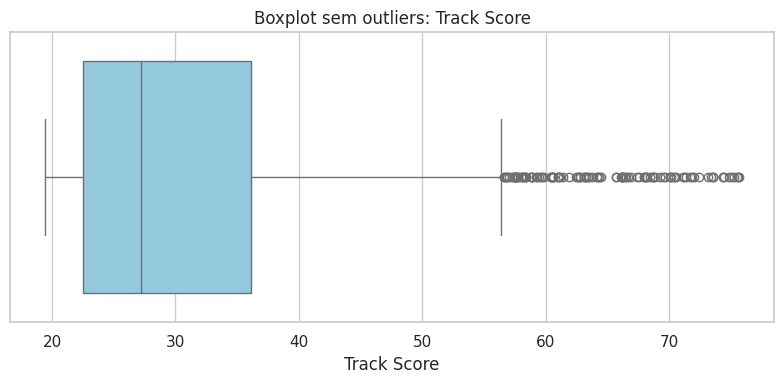

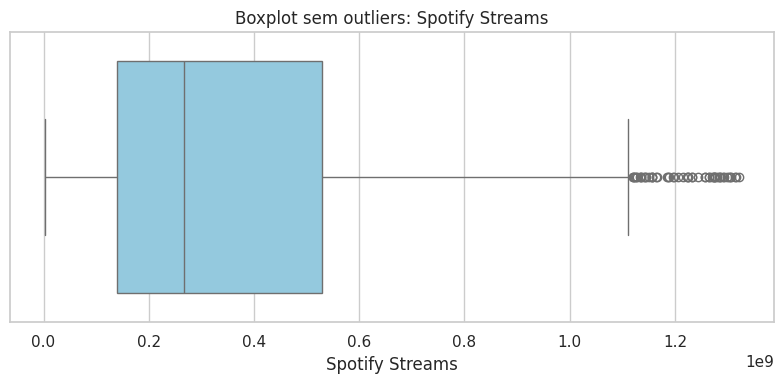

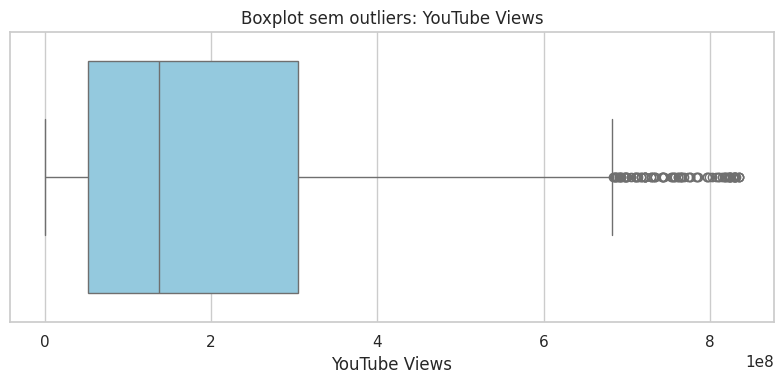

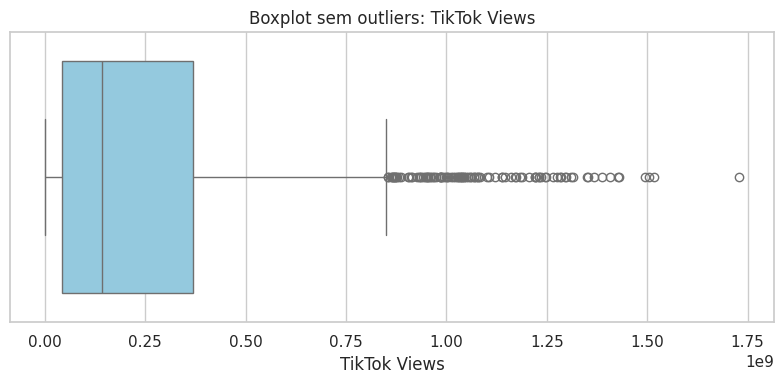

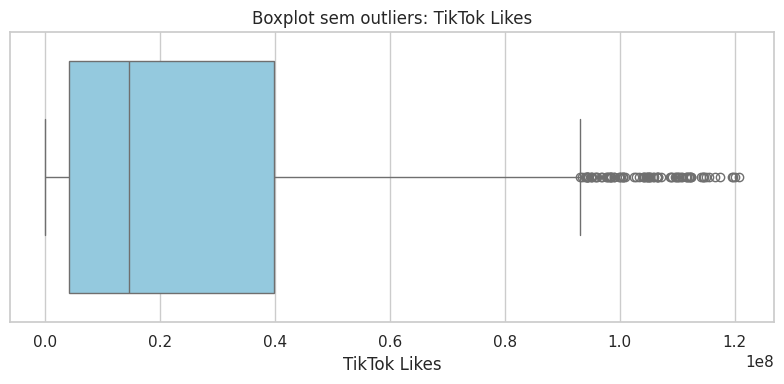

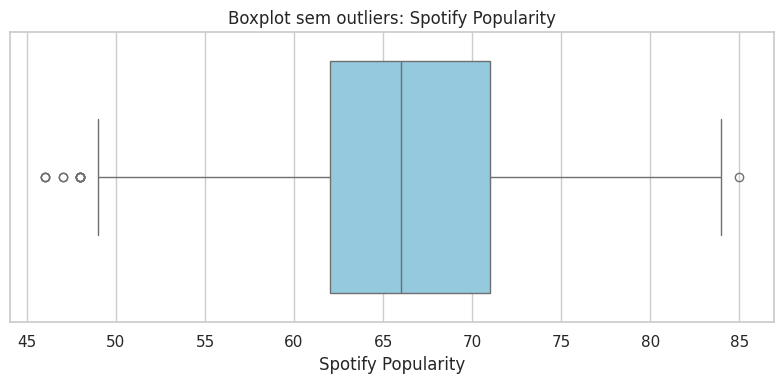

In [16]:
df_sem_outliers.head()

# Gera os boxplots sem outliers
for col in variaveis_outliers:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_sem_outliers[col], color='skyblue')
    plt.title(f'Boxplot sem outliers: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Comparação dos Boxplots com e sem Outliers**

* Ao analisarmos os boxplots das principais variáveis (streams, views, likes), percebemos a presença de valores muito altos que se distanciam do padrão, os famosos outliers. Isso era esperado, já que algumas músicas realmente se destacam muito mais que outras.

* Removemos esses outliers usando o método do IQR, e os novos boxplots mostraram distribuições mais equilibradas e fáceis de interpretar. Essa comparação ajuda a entender melhor o comportamento geral dos dados sem que valores extremos distorçam a análise.

* Apesar disso, decidimos manter os outliers em partes da análise, pois eles representam músicas de grande sucesso e são importantes para o contexto real da indústria musical.